定期存款整存整取(一年)
5年以上中长期贷款利率


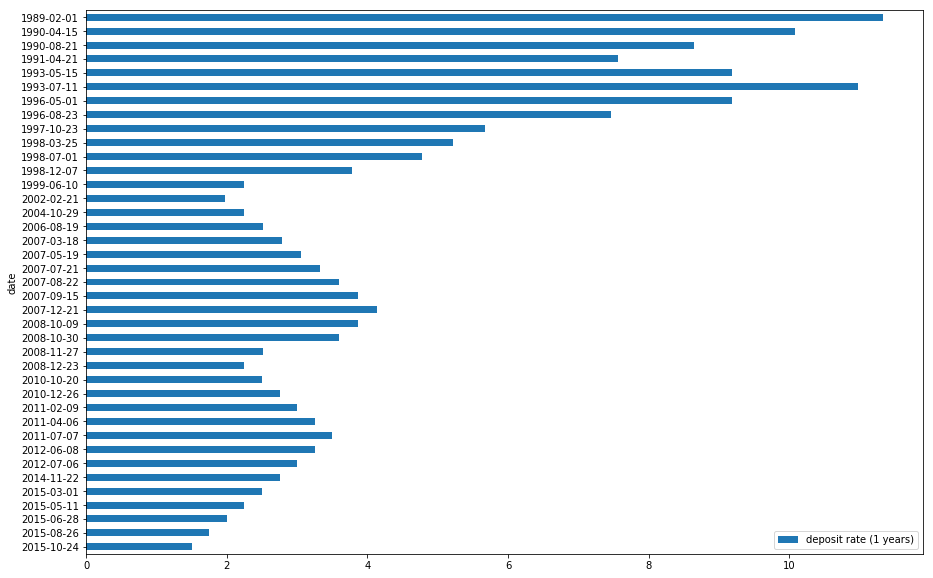

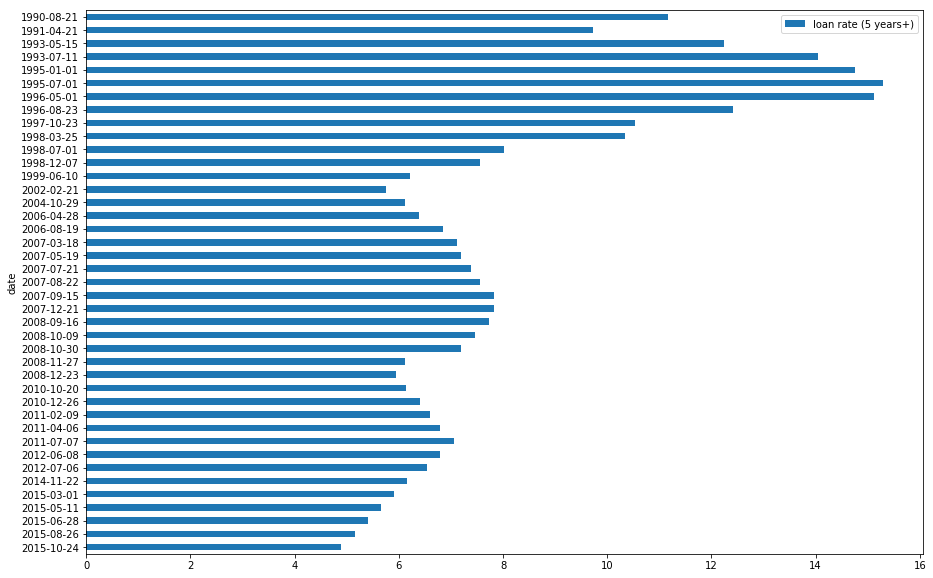

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tushare as ts
import pandas as pd

df=ts.get_deposit_rate()
df=df[df['deposit_type']=='定期存款整存整取(一年)']

df.index=df['date']
df['rate'] = df['rate'].astype('float64') 

print('定期存款整存整取(一年)')
ax=df.plot(kind='barh',figsize=(15,10))
ax.legend(['deposit rate (1 years)'])

df=ts.get_loan_rate()
df=df[df['loan_type']=='中长期贷款(五年以上)']

df.index=df['date']
df['rate'] = df['rate'].astype('float64') 

print('5年以上中长期贷款利率')
ax=df.plot(kind='barh',figsize=(15,10))
ax.legend(['loan rate (5 years+)'])


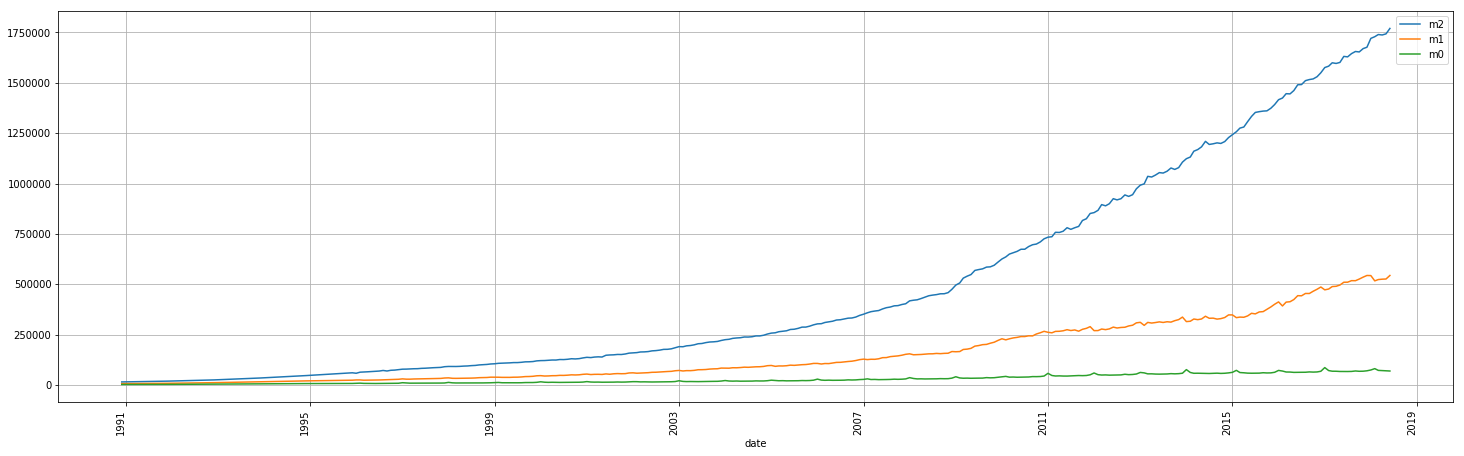

In [20]:
df=ts.get_money_supply()
df=df[df['m2'] != '--']
df['m2']=df['m2'].astype('float64')
df['m1']=df['m1'].astype('float64')
df['m0']=df['m0'].astype('float64')
df = df.sort_index(axis=0,ascending=False)
df.reindex(columns=['month'])
df['month'] = df['month'].astype('str')
df['date'] =  pd.to_datetime(df['month'],format='%Y.%m')
df.plot(kind='line', x='date',y=['m2','m1','m0'],rot=90,grid=True,figsize=(25,8))


M2/M1年增速


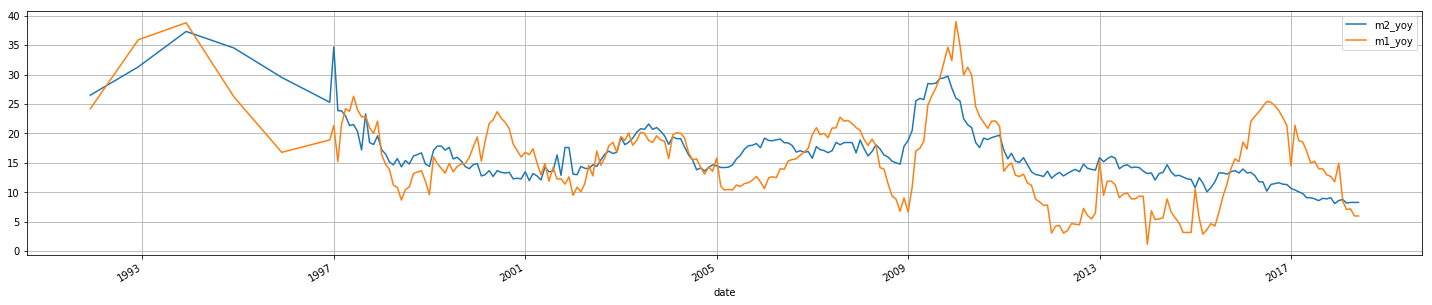

In [19]:
df=ts.get_money_supply()
df=df[df['m2_yoy'] != '--']
df=df[df['m1_yoy'] != '--']
df=df[df['m0_yoy'] != '--']
df['m2_yoy']=df['m2_yoy'].astype('float64')
df['m1_yoy']=df['m1_yoy'].astype('float64')
df['m0_yoy']=df['m0_yoy'].astype('float64')

df['month'] = df['month'].astype('str')
df['date'] =  pd.to_datetime(df['month'],format='%Y.%m')

print('M2/M1年增速')
df.plot(kind='line', x='date',y=['m2_yoy','m1_yoy'], grid=True,figsize=(25,5))



M0 M1 M2 年底余额


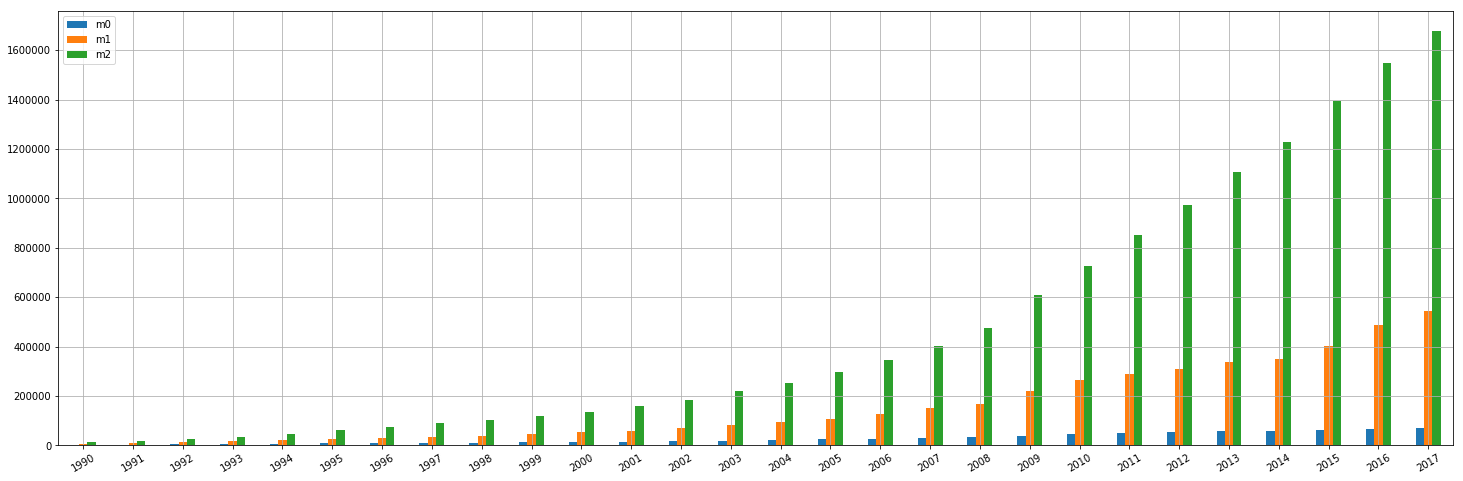

In [47]:
df=ts.get_money_supply_bal()
df['m2']=df['m2'].astype('float64')
df['m1']=df['m1'].astype('float64')
df['m0']=df['m0'].astype('float64')
df = df.sort_index(axis=0,ascending=False)
df.reindex(columns=['year'])
df['year'] = df['year'].astype('str')
df['date'] =  pd.to_datetime(df['year'],format='%Y')
df.index=df['date']
df.index=df.index.strftime('%Y')

print('M0 M1 M2 年底余额')
df.plot(kind='bar',y=['m0','m1','m2'],rot=30,grid=True,figsize=(25,8))


存款准备金率


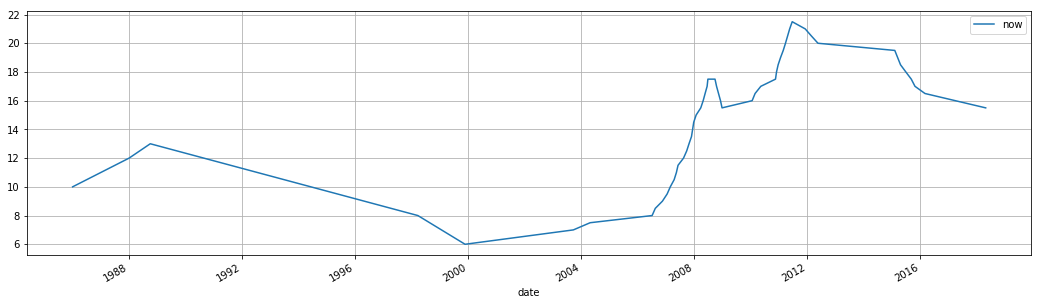

In [23]:

df=ts.get_rrr()
df=df[df['now'] != '--']
df['now']=df['now'].astype('float64')
df['date'] =  pd.to_datetime(df['date'],format='%Y-%m-%d')
print('存款准备金率')
df.plot(kind='line', x='date',y=['now'], grid=True,figsize=(18,5))


GDP 人均GDP


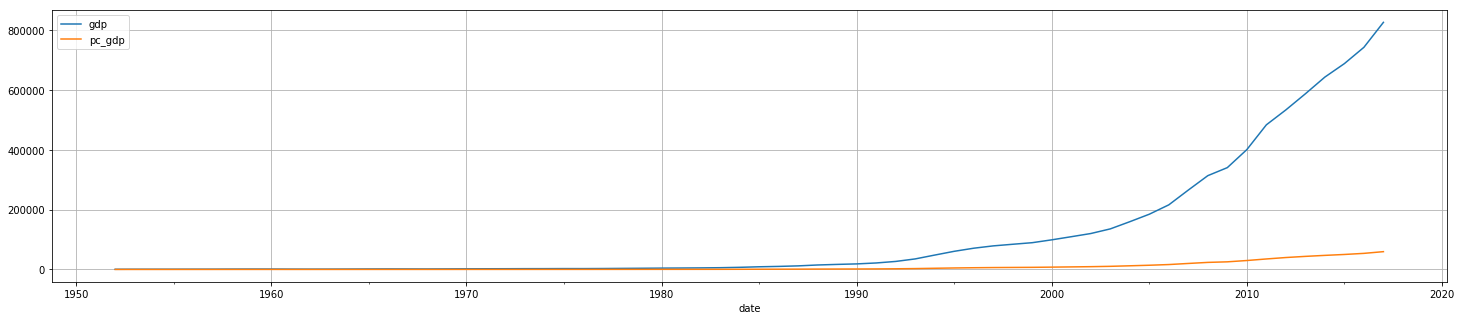

In [52]:
df=ts.get_gdp_year()
df['gdp']=df['gdp'].astype('float64')
df['pc_gdp']=df['pc_gdp'].astype('float64')
df = df.sort_index(axis=0,ascending=False)
df.reindex(columns=['year'])
df['year'] = df['year'].astype('str')
df['date'] =  pd.to_datetime(df['year'],format='%Y')
df.index=df['date']
df.index=df.index.strftime('%Y')
print('GDP 人均GDP')
df.plot(kind='line', x='date', y=['gdp','pc_gdp'], grid=True,figsize=(25,5))


GDP/人均GDP/M2


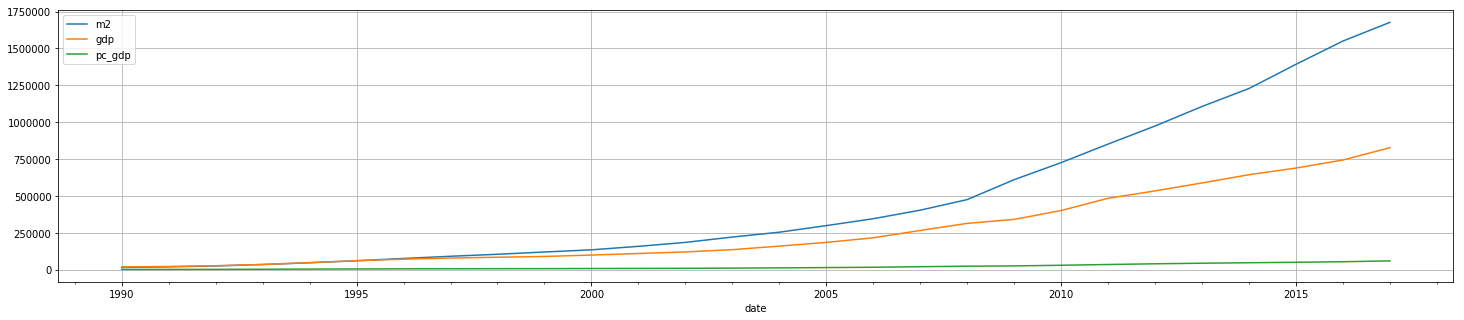

In [57]:
dfm=ts.get_money_supply_bal()
dfm['m2']=dfm['m2'].astype('float64')
dfm['m1']=dfm['m1'].astype('float64')
dfm['m0']=dfm['m0'].astype('float64')

dfgdp=ts.get_gdp_year()
dfgdp['gdp']=dfgdp['gdp'].astype('float64')
dfgdp['pc_gdp']=dfgdp['pc_gdp'].astype('float64')

df=dfm.copy()
df['gdp']=dfgdp['gdp']
df['pc_gdp']=dfgdp['pc_gdp']

df = df.sort_index(axis=0,ascending=False)
df.reindex(columns=['year'])
df['year'] = df['year'].astype('str')
df['date'] =  pd.to_datetime(df['year'],format='%Y')
df.index=df['date']
df.index=df.index.strftime('%Y')
print('GDP/人均GDP/M2')
df.plot(kind='line', x='date', y=['m2','gdp','pc_gdp'], grid=True,figsize=(25,5))
